Group 16 - Project 1
## Exploring Methods and Validation Techniques on Synthetic and Real-World Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy
import pandas
import scipy
import seaborn
import matplotlib.pyplot as plt
import math

In [ ]:
import sklearn.cluster
import sklearn.metrics

##(1)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data1.csv to Data1.csv
Saving Data2.csv to Data2.csv
Saving Data3.csv to Data3.csv
Saving Data4.csv to Data4.csv
Saving Data5.csv to Data5.csv
Saving Data6.csv to Data6.csv
Saving Data7.csv to Data7.csv
Saving Data8.csv to Data8.csv


In [ ]:
df1 = []
df1.append(pandas.read_csv('Data1.csv'))
df1.append(pandas.read_csv('Data2.csv'))
df1.append(pandas.read_csv('Data3.csv'))
df1.append(pandas.read_csv('Data4.csv'))
df1.append(pandas.read_csv('Data5.csv'))
df1.append(pandas.read_csv('Data6.csv'))
df1.append(pandas.read_csv('Data7.csv'))
df1.append(pandas.read_csv('Data8.csv'))

###Classification

As the data already have classification information (i.e. supervised learning), we can choose value for n_clusters accordingly.

In [ ]:
# The correct number of clusters can be obtained using nunique() function on 'Class' column
kms1 = []
acs1 = []
for i in range(len(df1)):
  #print(df1[i]['Class'].nunique())
  kms1.append(sklearn.cluster.KMeans(n_clusters=df1[i]['Class'].nunique(), random_state=0).fit(df1[i].iloc[:,1:len(df1[i].columns)-1]))
  acs1.append(sklearn.cluster.AgglomerativeClustering(n_clusters=df1[i]['Class'].nunique()).fit(df1[i].iloc[:,1:len(df1[i].columns)-1]))

###External Validation

In [ ]:
# Contingency matrix
kms1_cm = []
acs1_cm = []
for i in range(len(df1)):
  #print(i)
  kms1_cm.append(sklearn.metrics.cluster.contingency_matrix(df1[i]['Class'], kms1[i].labels_))
  #print(kms1_cm[i])
  acs1_cm.append(sklearn.metrics.cluster.contingency_matrix(df1[i]['Class'], acs1[i].labels_))
  #print(acs1_cm[i])

The cluster labels output from the classification do not match with the true labels, so we attempt to match them, under assumption that the classifier are likely to be correct.

In [ ]:
# The method is to match the true labels and predicted labels where they have the most number of agreements

kms1_cm_match = []
for k in range(len(df1)):

  cm = numpy.zeros(len(kms1[k].labels_), dtype=int)

  c = df1[k]['Class'].nunique()
  dft = pandas.DataFrame(kms1_cm[k], index=[i for i in range(1,1+c)], columns=[i for i in range(c)])
  #dft

  match = numpy.zeros(c, dtype=int)
  for i in range(c):
    # Find location of max value
    pos = dft.to_numpy().argmax()
    x = pos % len(dft.columns)
    y = pos // len(dft.columns)
    # Match: Mark this label
    match[dft.index[y]-1] = dft.columns[x]
    # Drop every value in the same row and column as the max value and find the next match
    dft = dft.drop(dft.index[y])
    dft = dft.drop(columns=[dft.columns[x]])
  #match

  # Create a matching label array
  for j in range(len(kms1[k].labels_)):
    for i in range(c):
      if (kms1[k].labels_[j]==match[i]):
        cm[j] = i + 1
  #cm
  kms1_cm_match.append(cm)

#kms1_cm_match

In [ ]:
acs1_cm_match = []
for k in range(len(df1)):

  cm = numpy.zeros(len(acs1[k].labels_), dtype=int)

  c = df1[k]['Class'].nunique()
  dft = pandas.DataFrame(acs1_cm[k], index=[i for i in range(1,1+c)], columns=[i for i in range(c)])
  #dft

  match = numpy.zeros(c, dtype=int)
  for i in range(c):
    # Find location of max value
    pos = dft.to_numpy().argmax()
    x = pos % len(dft.columns)
    y = pos // len(dft.columns)
    # Match: Mark this label
    match[dft.index[y]-1] = dft.columns[x]
    # Drop every value in the same row and column as the max value and find the next match
    dft = dft.drop(dft.index[y])
    dft = dft.drop(columns=[dft.columns[x]])
  #match

  # Create a matching label array
  for j in range(len(acs1[k].labels_)):
    for i in range(c):
      if (acs1[k].labels_[j]==match[i]):
        cm[j] = i + 1
  #cm
  acs1_cm_match.append(cm)

#acs1_cm_match

Accuracy: For the general case of multiple classes/clusters, it is the ratio between correct classifications and all classifications

$${\text{Accuracy}}={\frac {\text{correct classifications}}{\text{all classifications}}}$$

f1 score: Harmonic value between precision and recall metrics. It is calculated for each class or cluster.

$$F_{1}={\frac {2}{\mathrm {recall} ^{-1}+\mathrm {precision} ^{-1}}}=2{\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}={\frac {2\mathrm {tp} }{2\mathrm {tp} +\mathrm {fp} +\mathrm {fn} }}$$


In [ ]:
for k in range(len(df1)):
  print(f"Dataset{k+1}")
  print(f"Kmean:")
  acc = sklearn.metrics.accuracy_score(df1[k]['Class'], kms1_cm_match[k])
  f1  = sklearn.metrics.f1_score(df1[k]['Class'], kms1_cm_match[k], average=None)
  print(f"Accuracy: {acc}")
  print(f"f1 score: {f1}")
  print(f"Hierarchical clustering:")
  acc = sklearn.metrics.accuracy_score(df1[k]['Class'], acs1_cm_match[k])
  f1  = sklearn.metrics.f1_score(df1[k]['Class'], acs1_cm_match[k], average=None)
  print(f"Accuracy: {acc}")
  print(f"f1 score: {f1}")

Dataset1
Kmean:
Accuracy: 1.0
f1 score: [1. 1. 1. 1. 1. 1. 1.]
Hierarchical clustering:
Accuracy: 1.0
f1 score: [1. 1. 1. 1. 1. 1. 1.]
Dataset2
Kmean:
Accuracy: 0.7252475247524752
f1 score: [0.68621701 0.84444444 1.         0.        ]
Hierarchical clustering:
Accuracy: 0.8193069306930693
f1 score: [0.79154079 0.98039216 1.         0.        ]
Dataset3
Kmean:
Accuracy: 1.0
f1 score: [1. 1. 1. 1.]
Hierarchical clustering:
Accuracy: 0.9875
f1 score: [1.         0.97435897 0.97560976 1.        ]
Dataset4
Kmean:
Accuracy: 0.653
f1 score: [0.65334665 0.65265265]
Hierarchical clustering:
Accuracy: 0.799
f1 score: [0.74843554 0.83263947]
Dataset5
Kmean:
Accuracy: 0.7175
f1 score: [0.60627178 0.7797271 ]
Hierarchical clustering:
Accuracy: 0.6575
f1 score: [0.47908745 0.74487896]
Dataset6
Kmean:
Accuracy: 0.951416015625
f1 score: [0.95265287 0.95011281]
Hierarchical clustering:
Accuracy: 0.923828125
f1 score: [0.9281768  0.91891892]
Dataset7
Kmean:
Accuracy: 0.6363636363636364
f1 score: [1.    

###Plot of data using true clustering

Dataset1


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


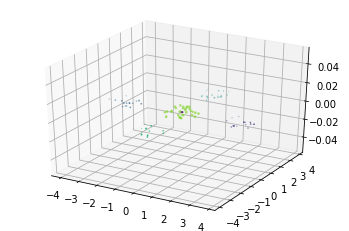

Dataset2


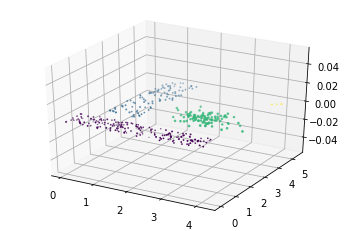

Dataset3


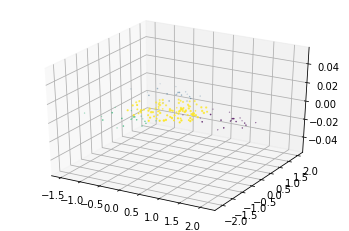

Dataset4


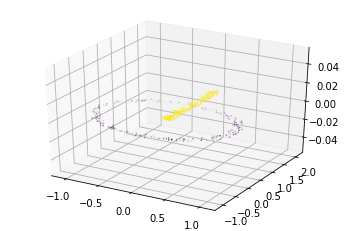

Dataset5


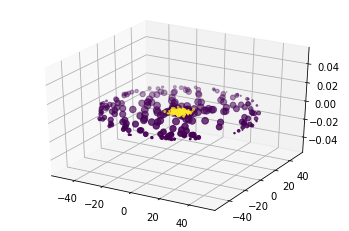

Dataset6


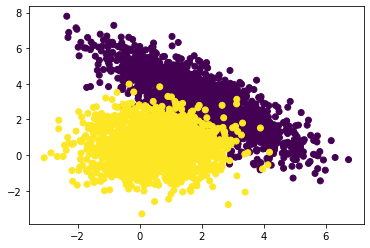

Dataset7


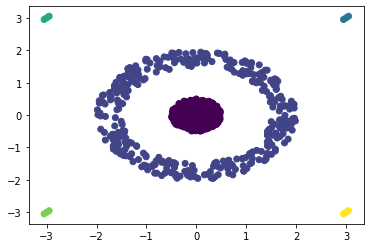

Dataset8


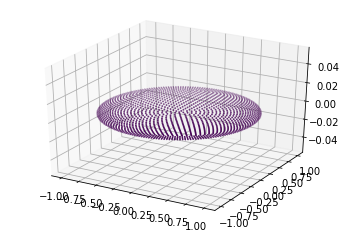

In [ ]:
for k in range(len(df1)):
  print(f"Dataset{k+1}")
  #2D
  if (len(df1[k].columns) == 4):

    fig = plt.figure()
    plt.scatter(df1[k].iloc[:,1], df1[k].iloc[:,2], c=df1[k]['Class'])
    plt.show()

  #3D
  if (len(df1[k].columns) == 5):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    plt.scatter(df1[k].iloc[:,1], df1[k].iloc[:,2], df1[k].iloc[:,3], c=df1[k]['Class'])
    plt.show()

###Plot of data using calculated clustering

Dataset1
Kmean


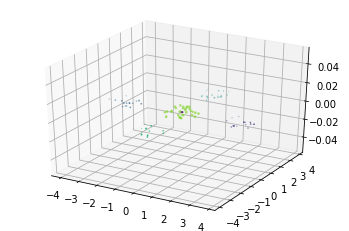

Hierarchical clustering


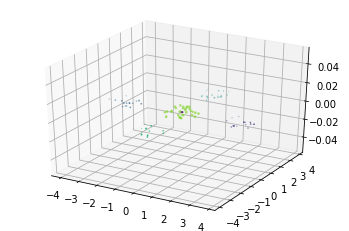

Dataset2
Kmean


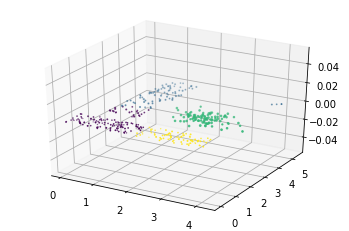

Hierarchical clustering


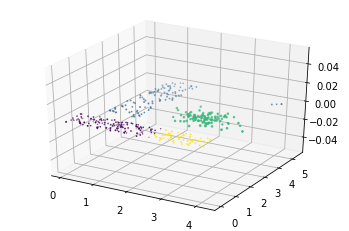

Dataset3
Kmean


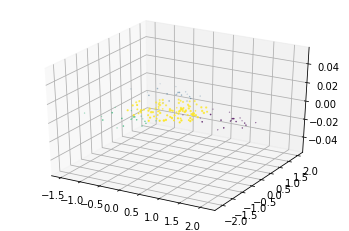

Hierarchical clustering


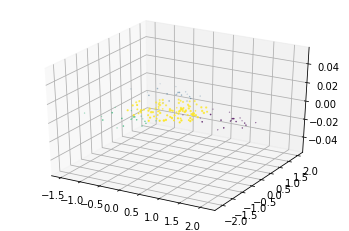

Dataset4
Kmean


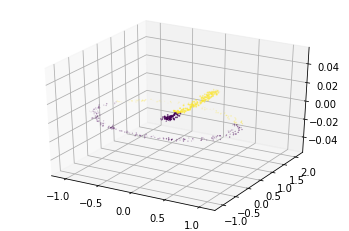

Hierarchical clustering


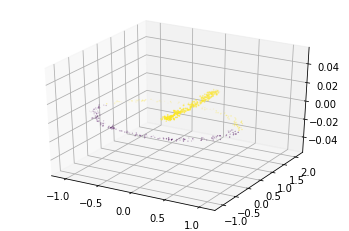

Dataset5
Kmean


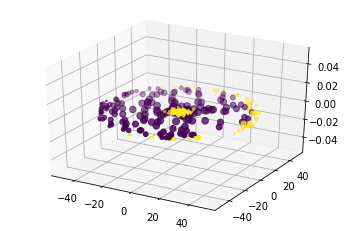

Hierarchical clustering


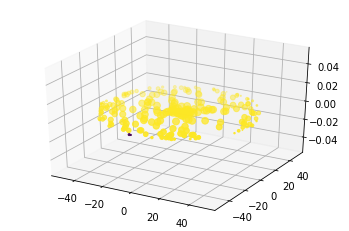

Dataset6
Kmean


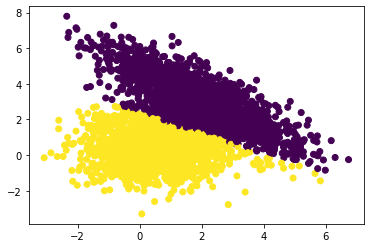

Hierarchical clustering


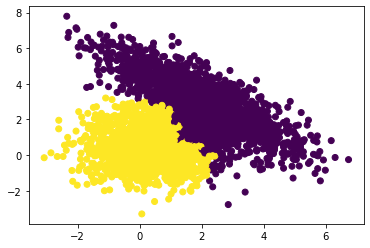

Dataset7
Kmean


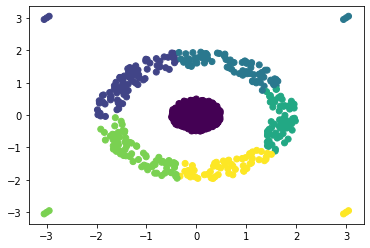

Hierarchical clustering


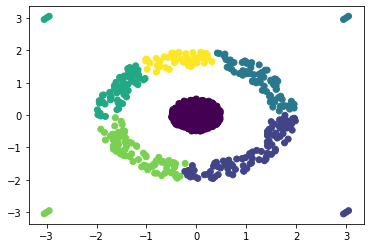

Dataset8
Kmean


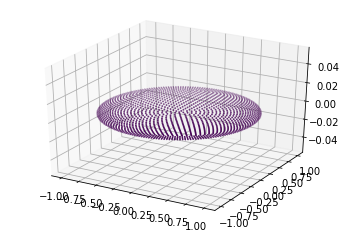

Hierarchical clustering


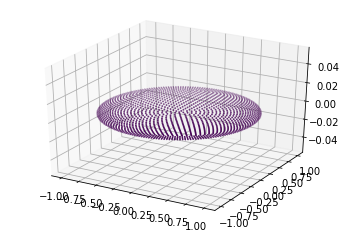

In [ ]:
for k in range(len(df1)):
  print(f"Dataset{k+1}")
  #2D
  if (len(df1[k].columns) == 4):
    print("Kmean")
    fig = plt.figure()
    plt.scatter(df1[k].iloc[:,1], df1[k].iloc[:,2], c=kms1_cm_match[k])
    plt.show()
    print("Hierarchical clustering")
    fig = plt.figure()
    plt.scatter(df1[k].iloc[:,1], df1[k].iloc[:,2], c=acs1_cm_match[k])
    plt.show()

  #3D
  if (len(df1[k].columns) == 5):
    print("Kmean")
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    plt.scatter(df1[k].iloc[:,1], df1[k].iloc[:,2], df1[k].iloc[:,3], c=kms1_cm_match[k])
    plt.show()
    print("Hierarchical clustering")
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    plt.scatter(df1[k].iloc[:,1], df1[k].iloc[:,2], df1[k].iloc[:,3], c=acs1_cm_match[k])
    plt.show()

##(2)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving World Indicators.csv to World Indicators.csv


In [ ]:
df2 = pandas.read_csv('World Indicators.csv')
df2

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,0.013,46.5%,5.0,2191193.0,"$15,533,800,000,000",0.177,"$8,467",187.0,0.006,0.7,0.033,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9%,7.0,4430.0,"$47,236,710,623",0.088,"$1,213",336.0,0.010,0.5,0.098,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,0.020,62.8%,141.0,70198.0,"$316,482,176,579",0.045,$487,864.0,0.014,0.4,0.172,77.0,71.0,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


In [ ]:
df2.dtypes

Preprocess on columns data type

In [ ]:
df2['GDP'] = df2['GDP'].str.replace(',', '')
df2['GDP'] = df2['GDP'].str.replace('$', '')
df2['GDP'] = df2['GDP'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
df2['Health Exp/Capita'] = df2['Health Exp/Capita'].str.replace(',', '')
df2['Health Exp/Capita'] = df2['Health Exp/Capita'].str.replace('$', '')
df2['Health Exp/Capita'] = df2['Health Exp/Capita'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
df2['Business Tax Rate'] = df2['Business Tax Rate'].str.replace('%', '')
df2['Business Tax Rate'] = df2['Business Tax Rate'].astype(float)
df2['Business Tax Rate'] = df2['Business Tax Rate']/100

In [ ]:
df2.dtypes

We have to resolve countries with missing value. While we can try and fill the missing values with either 0, minimum, maximum, mean, median, if a country is missing too many values, it would not make sense to include this country in the statistics with too many made-up values.

We remove any country with more than 5 missing values and fill the remaining missing values with median value.

In [ ]:
missing = df2.isnull().sum(axis=1)
df2_fix = df2.drop([i for i in df2.index if missing[i] > 5])
df2_fix.fillna(df2_fix.median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df2_fix

In [ ]:
# Reindex for continuous range
df2_fix.reset_index(inplace=True)
df2_fix.drop(columns=['index'], inplace=True)
df2_fix

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,0.720,25.0,41852.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,0.521,66.0,13576.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,0.659,29.0,3761.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,0.108,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,0.195,60.0,2215.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,0.435,13.0,18082.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,0.108,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.018,0.279,694.0,18082.0,4.363219e+09,0.060,490.0,199.0,0.022,0.3,0.118,74.0,67.0,1.0,0.283,0.652,0.065,0.663,The Americas,Suriname
177,0.015,0.291,41.0,20918.0,2.367635e+10,0.053,935.0,210.0,0.020,0.6,0.080,73.0,66.0,1.4,0.207,0.708,0.085,0.089,The Americas,Trinidad and Tobago
178,0.013,0.465,5.0,2191193.0,1.553380e+13,0.177,8467.0,187.0,0.006,0.7,0.033,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
179,0.015,0.419,7.0,4430.0,4.723671e+10,0.088,1213.0,336.0,0.010,0.5,0.098,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay


###Classification

There are still some problems with the data.

Some of the features are correlated or should be similar and thus it is redundant to include all of them.


*   Life Expectancy Female and Life Expectancy Male

Some of the features seem to be of insignificance.


*   Days to Start Business
*   Hours to do Tax



In [ ]:
df2_fix['Life Expectancy Female'] = (df2_fix['Life Expectancy Female'] + df2_fix['Life Expectancy Male']) /2
df2_fix.rename(columns={'Life Expectancy Female': 'Life Expectancy'}, inplace=True)
df2_fix.drop(columns=['Days to Start Business', 'Hours to do Tax', 'Life Expectancy Male'], inplace=True)
df2_fix

,Birth Rate,Business Tax Rate,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,0.720,41852.0,1.990709e+11,0.044,233.0,0.023,0.1,0.080,70.5,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,0.521,13576.0,1.041159e+11,0.034,178.0,0.107,0.1,0.188,51.5,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,0.659,3761.0,7.294900e+09,0.045,34.0,0.060,0.0,0.108,59.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,0.195,2215.0,1.529242e+10,0.052,404.0,0.039,0.1,0.110,46.5,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,0.435,18082.0,1.039576e+10,0.064,39.0,0.068,0.0,0.108,55.5,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.018,0.279,18082.0,4.363219e+09,0.060,490.0,0.022,0.3,0.118,70.5,1.0,0.283,0.652,0.065,0.663,The Americas,Suriname
177,0.015,0.291,20918.0,2.367635e+10,0.053,935.0,0.020,0.6,0.080,69.5,1.4,0.207,0.708,0.085,0.089,The Americas,Trinidad and Tobago
178,0.013,0.465,2191193.0,1.553380e+13,0.177,8467.0,0.006,0.7,0.033,78.5,0.9,0.197,0.669,0.133,0.809,The Americas,United States
179,0.015,0.419,4430.0,4.723671e+10,0.088,1213.0,0.010,0.5,0.098,76.5,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay


Scale the features/Normalization

In [ ]:
df2_fix_scale = df2_fix.copy()
df2_fix_scale.iloc[:,0:15] = (df2_fix.iloc[:,0:15] - df2_fix.iloc[:,0:15].min(axis = 0)) / (df2_fix.iloc[:,0:15].max(axis = 0) - df2_fix.iloc[:,0:15].min(axis = 0))
df2_fix_scale

,Birth Rate,Business Tax Rate,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.404762,0.192319,0.015067,0.012804,0.163522,0.022332,0.190909,0.111111,0.144231,0.662338,0.409091,0.402632,0.539267,0.188034,0.650933,Africa,Algeria
1,0.904762,0.132144,0.004698,0.006692,0.100629,0.016774,0.954545,0.111111,0.351923,0.168831,0.227273,0.942105,0.062827,0.089744,0.351262,Africa,Angola
2,0.690476,0.173874,0.001099,0.000459,0.169811,0.002223,0.527273,0.000000,0.198077,0.363636,0.363636,0.823684,0.167539,0.111111,0.366630,Africa,Benin
3,0.380952,0.033565,0.000532,0.000973,0.213836,0.039612,0.336364,0.111111,0.201923,0.038961,0.681818,0.581579,0.392670,0.136752,0.522503,Africa,Botswana
4,0.809524,0.106138,0.006350,0.000658,0.289308,0.002728,0.600000,0.000000,0.198077,0.272727,0.227273,0.892105,0.109948,0.094017,0.193194,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.238095,0.058966,0.006350,0.000270,0.264151,0.048302,0.181818,0.333333,0.217308,0.662338,0.454545,0.431579,0.463351,0.264957,0.630077,The Americas,Suriname
177,0.166667,0.062594,0.007390,0.001513,0.220126,0.093270,0.163636,0.666667,0.144231,0.636364,0.636364,0.231579,0.609948,0.350427,0.000000,The Americas,Trinidad and Tobago
178,0.119048,0.115210,0.803248,1.000000,1.000000,0.854386,0.036364,0.777778,0.053846,0.870130,0.409091,0.205263,0.507853,0.555556,0.790340,The Americas,United States
179,0.166667,0.101300,0.001344,0.003030,0.440252,0.121362,0.072727,0.555556,0.178846,0.818182,0.636364,0.273684,0.426702,0.581197,0.940724,The Americas,Uruguay


Silhouette analysis

For n_clusters = 2 The average silhouette_score is : 0.41125160111216985
For n_clusters = 3 The average silhouette_score is : 0.3062736951436777
For n_clusters = 4 The average silhouette_score is : 0.2455212176540307
For n_clusters = 5 The average silhouette_score is : 0.22406401081681307
For n_clusters = 6 The average silhouette_score is : 0.22873475649507857
For n_clusters = 7 The average silhouette_score is : 0.2122897742566557
For n_clusters = 8 The average silhouette_score is : 0.2048762643273339
For n_clusters = 9 The average silhouette_score is : 0.23155793389246002
For n_clusters = 10 The average silhouette_score is : 0.18195286428441448


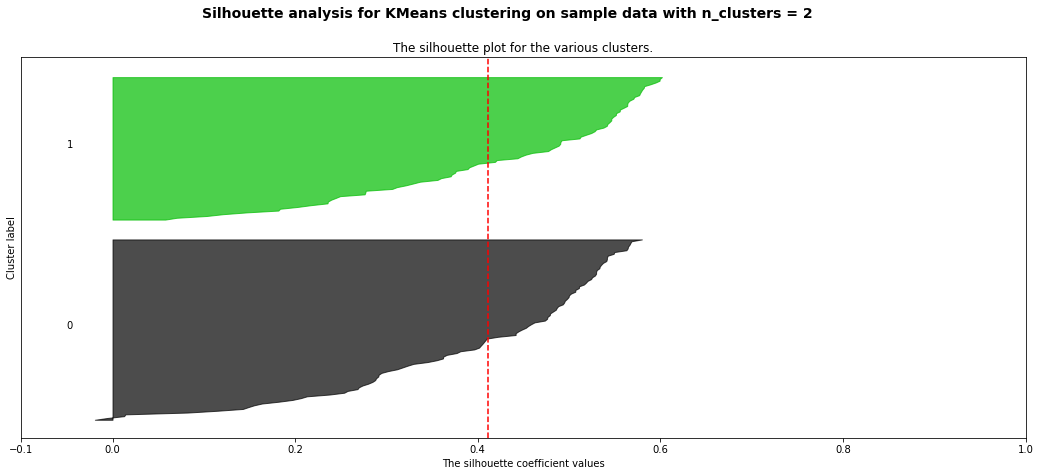

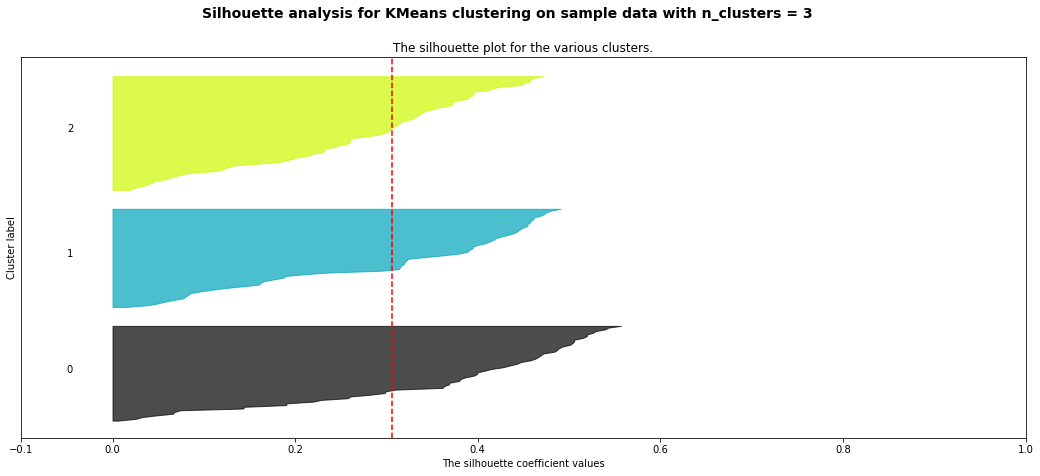

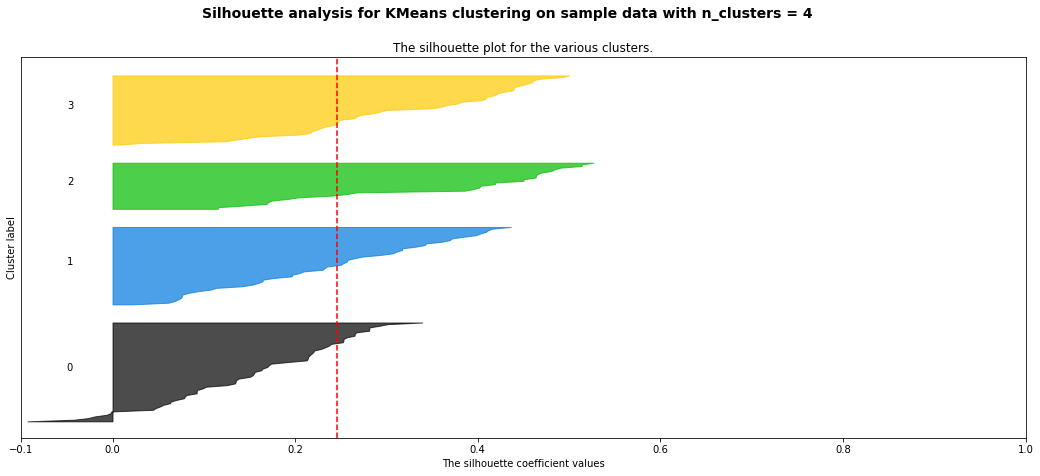

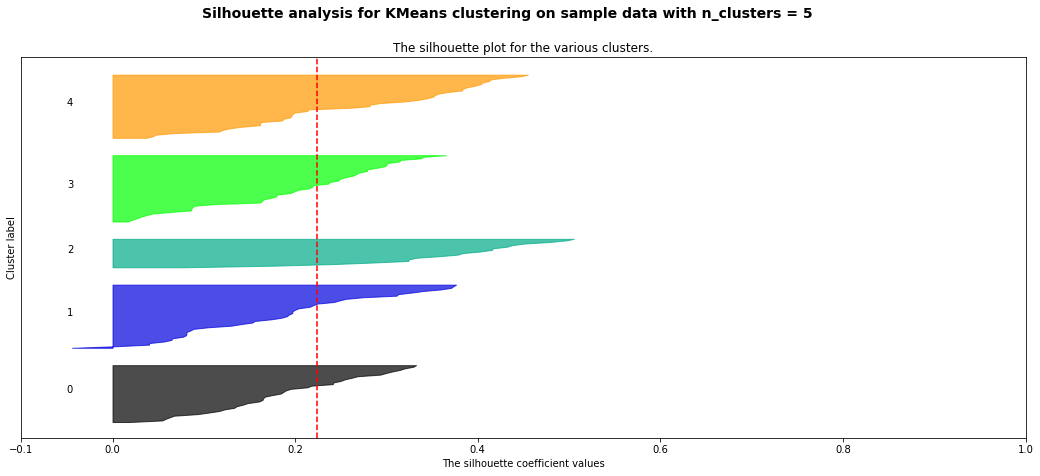

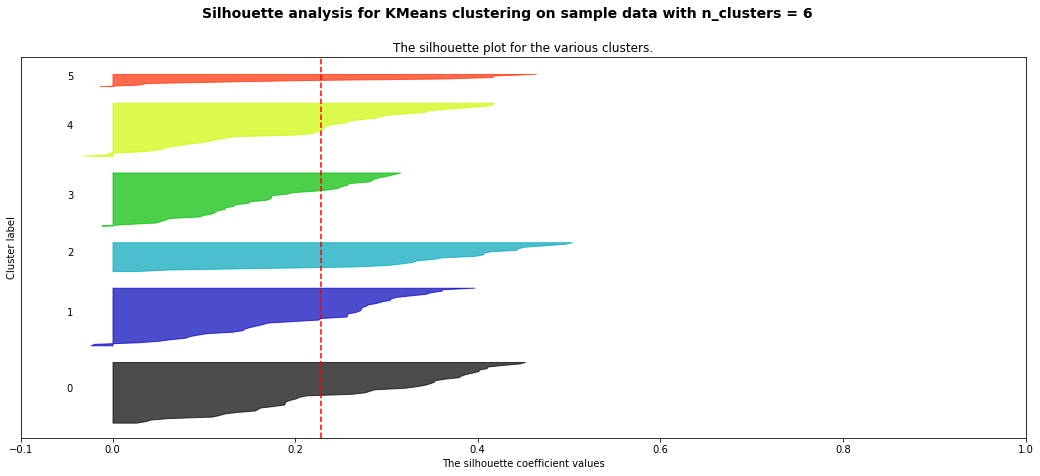

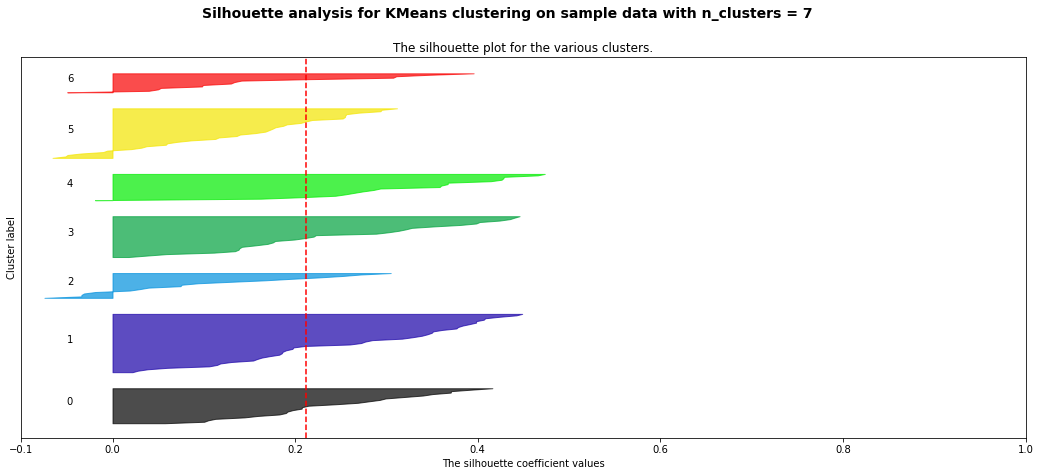

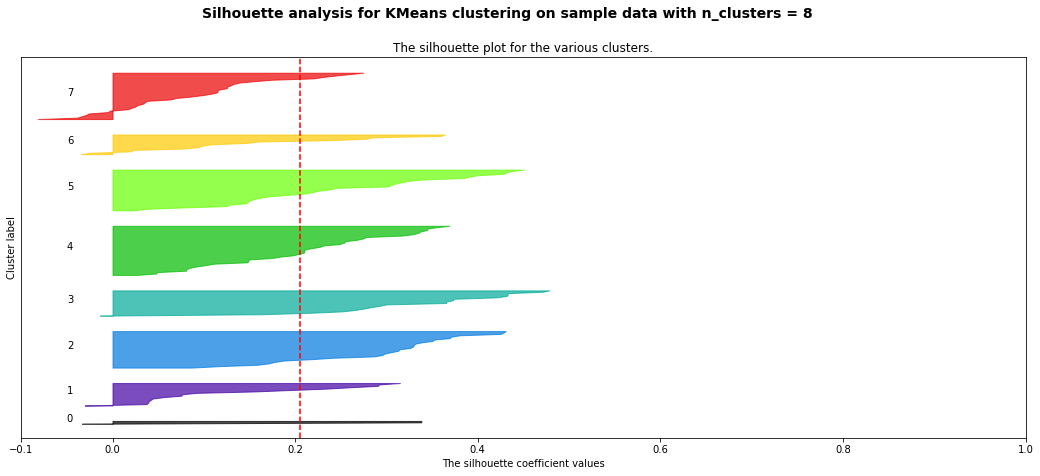

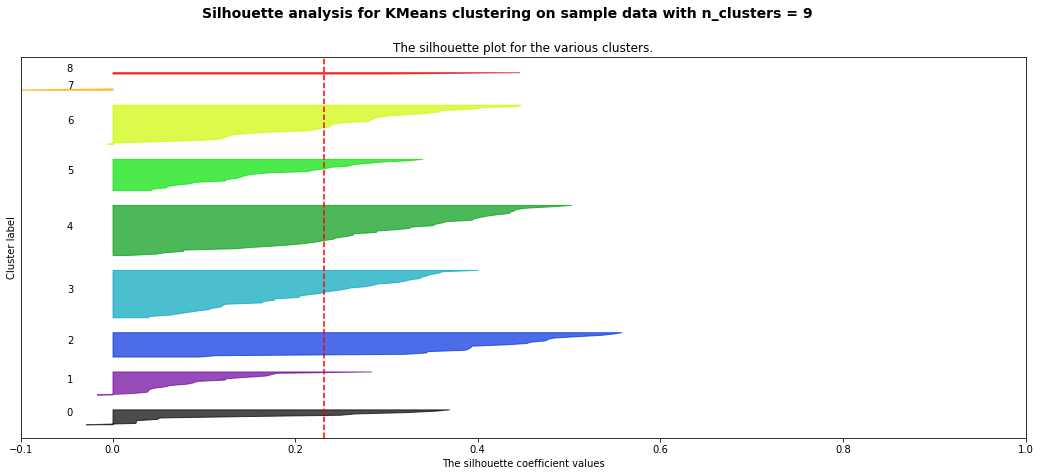

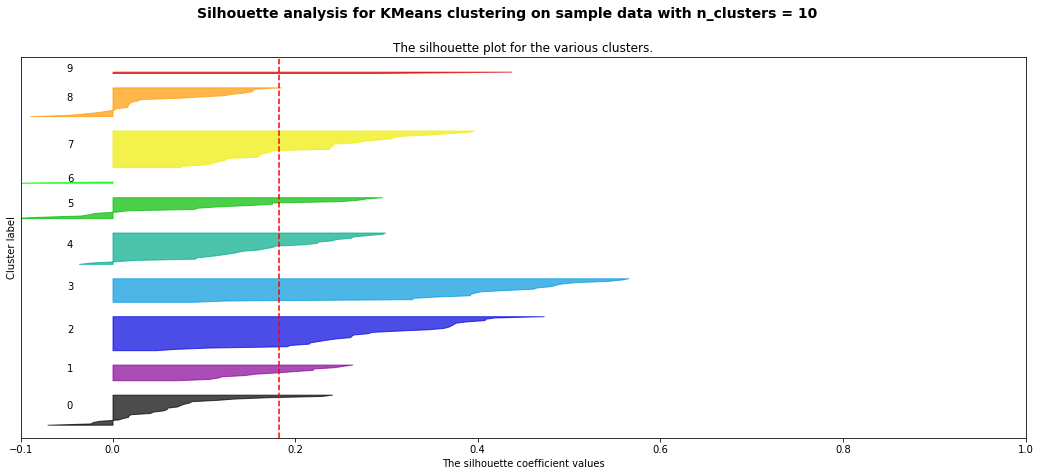

In [ ]:
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df2_fix_scale) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df2_fix_scale.iloc[:,0:15])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sklearn.metrics.silhouette_score(df2_fix_scale.iloc[:,0:15], cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(df2_fix_scale.iloc[:,0:15], cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            numpy.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    ## 2nd Plot showing the actual clusters formed
    #colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(
    #    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    #)

    ## Labeling the clusters
    #centers = clusterer.cluster_centers_
    ## Draw white circles at cluster centers
    #ax2.scatter(
    #    centers[:, 0],
    #    centers[:, 1],
    #    marker="o",
    #    c="white",
    #    alpha=1,
    #    s=200,
    #    edgecolor="k",
    #)

    #for i, c in enumerate(centers):
    #    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    #ax2.set_title("The visualization of the clustered data.")
    #ax2.set_xlabel("Feature space for the 1st feature")
    #ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

The silhouette analysis show that n_clusters = 2, 3 are the optimum numbers of clusters.

In [ ]:
kms2 = []
kms2.append(sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit(df2_fix_scale.iloc[:,0:15]))
kms2.append(sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(df2_fix_scale.iloc[:,0:15]))
acs2 = []
acs2.append(sklearn.cluster.AgglomerativeClustering(n_clusters=2).fit(df2_fix_scale.iloc[:,0:15]))
acs2.append(sklearn.cluster.AgglomerativeClustering(n_clusters=3).fit(df2_fix_scale.iloc[:,0:15]))

###Internal Validation

In [ ]:
!pip install validclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import validclust

The Calinski-Harabasz score, or CH, combines the cohesion and separation metrics. Between clustering methods of same number of clusters, higher CH value mean better clustering.

From https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index

> For a set of data $E$ of size $n_E$ which has been clustered into $k$ clusters, the Calinski-Harabasz score $s$ is defined as the ratio of the between-clusters dispersion mean and the within-cluster dispersion:
> $$s = \frac{\mathrm{tr}(B_k)}{\mathrm{tr}(W_k)} \times \frac{n_E - k}{k - 1}$$
> where $\mathrm{tr}(B_k)$ is trace of the between group dispersion matrix and $\mathrm{tr}(W_k)$ is the trace of the within-cluster dispersion matrix defined by:
> $$W_k = \sum_{q=1}^k \sum_{x \in C_q} (x - c_q) (x - c_q)^T$$
> $$B_k = \sum_{q=1}^k n_q (c_q - c_E) (c_q - c_E)^T$$
> with $C_q$ the set of points in cluster $q$, $c_q$ the center of cluster $q$, $c_E$ the center of $E$, and $n_q$ the number of points in cluster $q$.

The Dunn index, or DI, is another clustering evaluation metric. It is the ratio between the lowest distance between any 2 clusters and the highest distance between 2 elements within any group. Higher value means better clustering.

With $m$ clusters,

$$\mathit{DI}_m = \frac{ \underset{ 1 \leqslant i < j \leqslant m}{\text{min}} \left.\delta(C_i,C_j)\right.}{ \underset{ 1 \leqslant k \leqslant m}{\text{max}} \left.\Delta_k\right.}$$

where $\delta(C_i,C_j)$ is the distance between the centroids of cluster $C_i$ and $C_j$; $\Delta_k$ is the maximum distance between any 2 elements in cluster $k$.

In [ ]:
dist = sklearn.metrics.pairwise_distances(df2_fix_scale.iloc[:,0:15])
for i in range(len(kms2)):
  print(f"Number of clusters: {kms2[i].n_clusters}")
  km2_dunn = validclust.dunn(dist, kms2[i].labels_)
  ac2_dunn = validclust.dunn(dist, acs2[i].labels_)
  km2_ch = sklearn.metrics.calinski_harabasz_score(df2_fix_scale.iloc[:,0:15], kms2[i].labels_)
  ac2_ch = sklearn.metrics.calinski_harabasz_score(df2_fix_scale.iloc[:,0:15], acs2[i].labels_)
  print('DI Data using Kmean clustering: '+ str(km2_dunn))
  print('DI Data using hierarchical clustering: '+ str(ac2_dunn))
  print('CH Data using Kmean clustering: '+ str(km2_ch))
  print('CH Data using hierarchical clustering: '+ str(ac2_ch))

Number of clusters: 2
DI Data using Kmean clustering: 0.1286669234030813
DI Data using hierarchical clustering: 0.14299526196214213
CH Data using Kmean clustering: 183.861800450222
CH Data using hierarchical clustering: 171.70342415239926
Number of clusters: 3
DI Data using Kmean clustering: 0.12942243185083666
DI Data using hierarchical clustering: 0.1419441236124529
CH Data using Kmean clustering: 144.83955823941713
CH Data using hierarchical clustering: 132.90486496661904


###Best clustering method

Dunn index indicates about the same value for both n_clusters = 2 and 3, which seems to support the silhouette analysis. In this case, we choose the greater cluster number, n_clusters = 3 for further analysis.

Calinski-Harabasz scoreshows that Kmean is better than hierarchical clustering within the same number of clustering, but hierarchical clustering provide better DI value.

In our opinion, the CH score is more important than DI, because the DI only reflects the minimum and maximum distance, which is usually on the extreme part, or outlier of the sample, while CH coeff accounts better for all data points.

Thus we conclude Kmean clustering with n_clusters = 3 provides the best clustering.

###Sample scatter plots showing notable differing features between clusters

In [ ]:
df2_fix_scale

,Birth Rate,Business Tax Rate,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.404762,0.192319,0.015067,0.012804,0.163522,0.022332,0.190909,0.111111,0.144231,0.662338,0.409091,0.402632,0.539267,0.188034,0.650933,Africa,Algeria
1,0.904762,0.132144,0.004698,0.006692,0.100629,0.016774,0.954545,0.111111,0.351923,0.168831,0.227273,0.942105,0.062827,0.089744,0.351262,Africa,Angola
2,0.690476,0.173874,0.001099,0.000459,0.169811,0.002223,0.527273,0.000000,0.198077,0.363636,0.363636,0.823684,0.167539,0.111111,0.366630,Africa,Benin
3,0.380952,0.033565,0.000532,0.000973,0.213836,0.039612,0.336364,0.111111,0.201923,0.038961,0.681818,0.581579,0.392670,0.136752,0.522503,Africa,Botswana
4,0.809524,0.106138,0.006350,0.000658,0.289308,0.002728,0.600000,0.000000,0.198077,0.272727,0.227273,0.892105,0.109948,0.094017,0.193194,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.238095,0.058966,0.006350,0.000270,0.264151,0.048302,0.181818,0.333333,0.217308,0.662338,0.454545,0.431579,0.463351,0.264957,0.630077,The Americas,Suriname
177,0.166667,0.062594,0.007390,0.001513,0.220126,0.093270,0.163636,0.666667,0.144231,0.636364,0.636364,0.231579,0.609948,0.350427,0.000000,The Americas,Trinidad and Tobago
178,0.119048,0.115210,0.803248,1.000000,1.000000,0.854386,0.036364,0.777778,0.053846,0.870130,0.409091,0.205263,0.507853,0.555556,0.790340,The Americas,United States
179,0.166667,0.101300,0.001344,0.003030,0.440252,0.121362,0.072727,0.555556,0.178846,0.818182,0.636364,0.273684,0.426702,0.581197,0.940724,The Americas,Uruguay


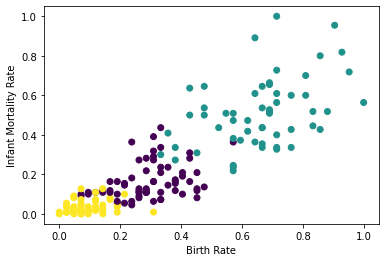

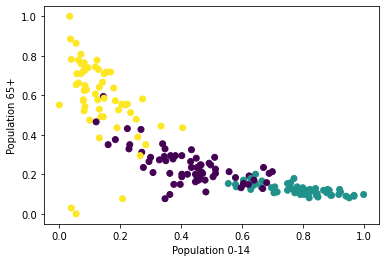

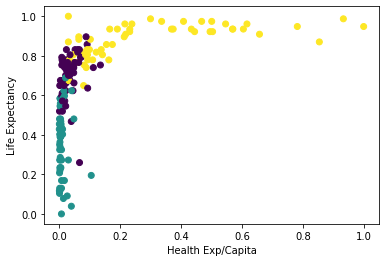

In [ ]:
x = ['Birth Rate', 'Population 0-14', 'Health Exp/Capita']
y = ['Infant Mortality Rate', 'Population 65+', 'Life Expectancy']

for i in range(len(x)):
  plt.scatter(df2_fix_scale[x[i]], df2_fix_scale[y[i]], c=kms2[1].labels_)
  plt.xlabel(x[i])
  plt.ylabel(y[i])
  plt.show()